# 1 Нелинейные уравнения

**Постановка задачи:**

Приближенно найти корни уравнения $f(x)=0$







$$
\partial_x^2/2 - {I}_{[-1/2,1/2]} u + \epsilon = 0, \kappa_0 = \sqrt{2 \varepsilon_0} , k_0 = \sqrt{2(u-\varepsilon_0)}\implies {\sin(k_0/2)k_0 = \kappa_0\cos(k_0/2)}\implies \\
    \tan(k_0/2) = \sqrt{2u-k_0^2}/k_0
$$



In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [26]:
def f(x, u):
    return np.tan(x/2) - np.sqrt(2*u-x*x)/x

## Локализакция корней

<IPython.core.display.Javascript object>


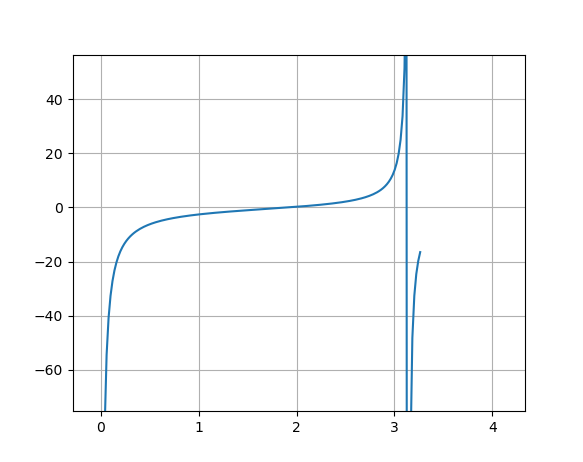

/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x
/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x


interactive(children=(FloatSlider(value=0.85, description='u', max=10.0, step=0.01), Output()), _dom_classes=(…

In [27]:
from ipywidgets import interact, interact_manual

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1, 1, 1)

u=1
k = np.linspace(0, 20, 1000)
line, = ax.plot(k, f(k, u))
ax.grid(True)
def update(u = 0.85):
    line.set_ydata(f(k, u))
    fig.canvas.draw_idle()

interact(update, u=(0,10, 0.01));

## Бисекция


<IPython.core.display.Javascript object>


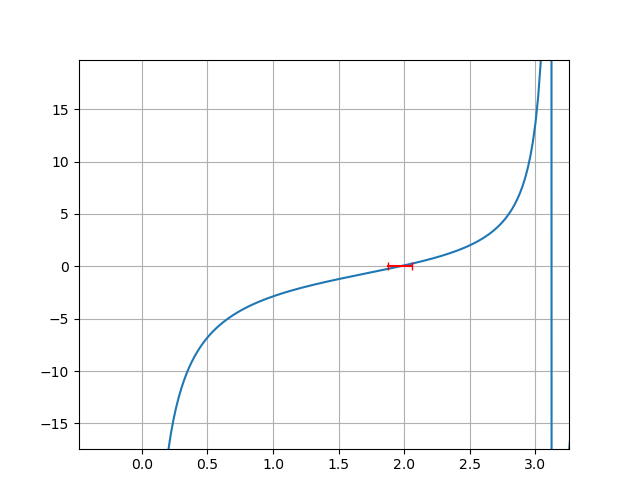

/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x
/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x


interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

In [28]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1, 1, 1)

u=6.34
k = np.linspace(0, 20, 1000)
ax.plot(k, f(k, u))


a,b = 1e-8,3.
f_a, f_b = f(a, u), f(b, u)

line, = ax.plot([a,b], [0,0], marker='|', color='red')
ax.grid(True)



def do_bisec():
    global a,b,f_a,f_b
    x_sec = (a+b)/2
    f_sec = f(x_sec, u)
    
    if f_sec*f_a < 0:
        b = x_sec
        f_b = f_sec
    else:
        a = x_sec
        f_a = f_sec
    line.set_xdata([a,b])
    fig.canvas.draw_idle()
    
interact_manual(do_bisec);

## Сжимающее отображение (Метод простой итерации)

Имеем начальное приближение к корню $x^{(0)}$. Нужно решить уравнение $f(x_*)=0$. Перепишем данное уравнение в виде $$x_*=g(x_*)$$, 
где $g(x_*)$ - некоторая функция. Самый простой выбор: 
$$g(x)=x-\alpha(x) f(x)$$. 

**Суть метода:**

Имеем начальное приближение к корню $x^{(0)}$, на каждом шаге $n$ получаем новое приближение к корню в виде $x^{(n)}=g(x^{(n-1)})$.

Если существует предел $\lim_{n\rightarrow \infty} x^{(n)} = x_*$, тогда $f(x_*)=0$.

Метод сходится, если в некоторой окрестности корня $|g'(x)|\le q<1$. В данном случае сходиость линейная с показателем геометрической прогрессии $q$.

In [29]:
x_c = [1.5]
x_c.append([1,2])
x_c

[1.5, [1, 2]]

<IPython.core.display.Javascript object>


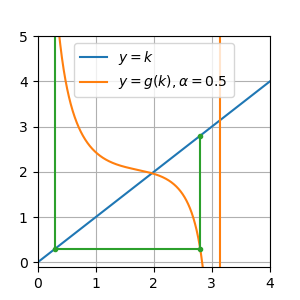

/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x
/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x


interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

In [30]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1, 1, 1)

u=6.34
k = np.linspace(0, 5, 1000)
ax.plot(k, k, label=r'$y=k$')

alpha = 0.5
def g(x, u):
    return x - alpha*f(x, u)

ax.plot(k, g(k, u), label=fr'$y=g(k), \alpha={alpha}$')

x  = [2.8]
y = [2.8]


line, = ax.plot(x, y, marker='.')
ax.grid(True)
ax.set_ylim(-0.1,5)
ax.set_xlim(0,4)
ax.legend()

def do_iter():
    x_c = x[-1]
    x_next = g(x_c, u)
    
    x.append(x_c) ## line down
    y.append(x_next)
    
    x.append(x_next) ##line hor
    y.append(x_next)

    
    line.set_xdata(x)
    line.set_ydata(y)
    
    fig.canvas.draw_idle()
    
interact_manual(do_iter);

**Можно ускорить сходимость метода простой итерации, если положить $\alpha=\frac{2}{m+M}$**, где  $0<m\le f'(x) \le M$ в некоторой окрестности корня $x_*$. 

Скорость сходимости зависит от $|g'(x)|\le q = max(|1-\alpha m|, |1-\alpha M|)1$. Наилучшее $\alpha=\frac{2}{m+M}$ и $q=\frac{M-m}{M+m}$.

### Метод Ньютона:

$\alpha(x)=1/f'(x)$

**Суть метода:**

Уравнение касательной к функции $f(x)$ в точке $x^{(n)}$:

$y=(x-x^{(n)})f'(x^{(n)})+f(x^{(n)})$

Когда касательная пересекает ось $x$: 

$0=(x-x^{(n)})f'(x^{(n)})+f(x^{(n)})$, 

$$x=x^{(n)}-\frac{f(x^{(n)})}{f'(x^{(n)})}$$

<img src="nwmeth.png">


**Сходимость метода - квадратичная** 

Пусть $x_*$ - простой корень.

Введем $\delta_{n}=x^{(n)}-x_*$

$f(x)=f(x_*)+\frac{df}{dx}(x-x_*)+\frac{1}{2}\frac{d^2f}{dx^2}(x-x_*)^2+\frac{1}{6}\frac{d^3f}{dx^3}(x-x_*)^3+...$
$f'(x)=\frac{df}{dx}(x_*)+\frac{d^2f}{dx^2}(x-x_*)+\frac{1}{2}\frac{d^3f}{dx^3}(x-x_*)^2+...$

$\delta_{n+1}=\delta_{n}-\frac{f(x^{(n)})}{f'(x^{(n)})}=\delta_{n}-\delta_{n}\frac{0+\frac{df}{dx}\delta_{n}+\frac{1}{2}\frac{d^2f}{dx^2}\delta_{n}^2+...}{\frac{df}{dx}(x_*)+\frac{d^2f}{dx^2}\delta_{n}+...}\sim \delta_{n}^2\frac{f''}{2f'}$



Example:
find root $13^{1/7}$
$$
x^7 = 13 \implies f(x) = x^7 - 13, f' = 7x^6 \implies x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

<IPython.core.display.Javascript object>


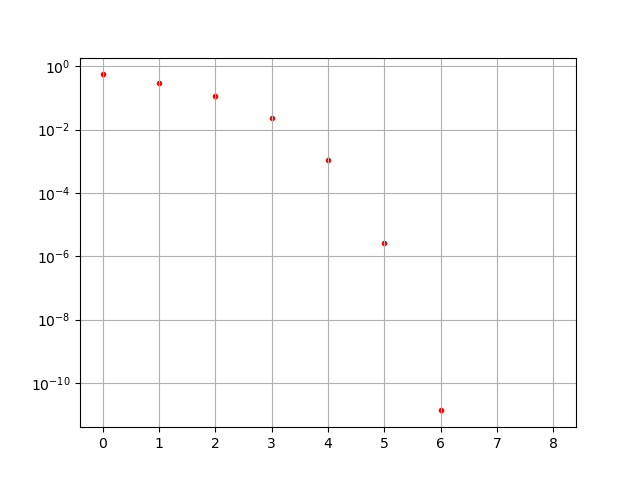

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

In [31]:
x_real = 13**(1/7)
f = lambda x: x**7 - 13
df = lambda x: 7*x**6


x=2
err = np.abs(x-x_real)
n = 0
fig = plt.figure()

plt.scatter(n, err, marker='.', color='red')

plt.grid(True)
plt.yscale('log')

def do_iter():
    global x,n
    x = x - f(x)/df(x)
    n += 1
    err = np.abs(x-x_real)
    plt.scatter(n, err, marker='.', color='red')
    print(err)
    fig.canvas.draw_idle()
    
interact_manual(do_iter);

**В случае кратного корня сходимость линейная, однако можно модифицировать метод и восстановить квадратичную сходимость**

Пусть $x_*$ - корень кратности $m$, т.е. $\frac{d^{n}f}{dx^{n}}=0$ $\forall n < m$. Модифицируем итерационный процесс:

$x^{(n+1)}=x^{(n)}-m\frac{f(x^{(n)})}{f'(x^{(n)})}$


Снова рассмотрим $\delta_{n+1}$:

$\delta_{n+1}=\delta_{n}-\frac{f(x^{(n)})}{f'(x^{(n)})}=\delta_{n}-m\frac{f^{(m)}\frac{\delta_n^m}{m!}+f^{(m+1)}\frac{\delta_n^{m+1}}{(m+1)!}+...}{f^{(m)}\frac{\delta_n^{m-1}}{(m-1)!}+f^{(m+1)}\frac{\delta_n^m}{m!}+...}\sim \color{blue}{\text{youself }}$

**Недостатки метода Ньютона**

1. Только локальная сходимость. Т.е. если начальное приближение задано очень далеко от корня, то процесс может не сойтись.
Пример: $f(x)=x^{3}-2x+2$, $x_0=0$ (метод применим и для комплексной переменной).
2. Нет оценки на интервал, в котором заключен корень (в отличие от бисекций).

<img src="nwmeth_loc.png">
3. Нужно рассчитывать производную.

Во многих практических приложениях последнее невозможно напрямую, поэтому используется разностная аппроксимаци производной:

$x^{(n+1)}=x^{(n)}-\frac{f(x^{(n)})(x^{(n)}-x^{(n-1)})}{f(x^{(n)})-f(x^{(n-1)})} \implies q=1.6$

**Когда нужно прерывать процесс?**

Апостериорная оценка точности: $|x^{(n)}-x^{(n-1)}|<\varepsilon$ и $|f(x^{(n)})|<\varepsilon_2$

<IPython.core.display.Javascript object>


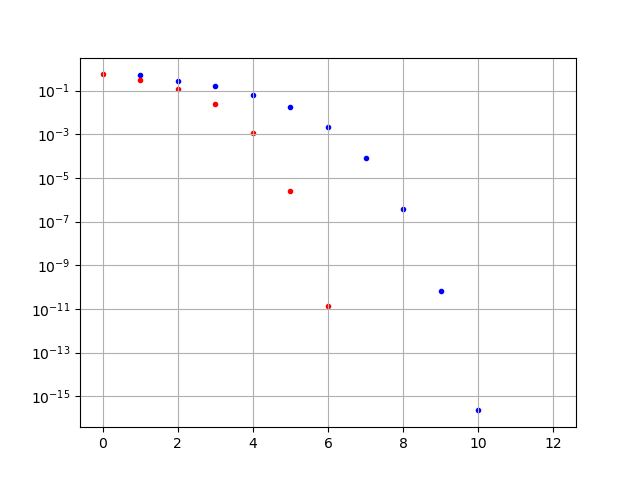

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

In [32]:
x_real = 13**(1/7)
f = lambda x: x**7 - 13
df = lambda x: 7*x**6


x=2
err = np.abs(x-x_real)
n = 0
fig = plt.figure()

x_c = 2
x_p = 3

plt.scatter(n, err, marker='.', color='red')

plt.grid(True)
plt.yscale('log')

def do_iter():
    global x,n, x_p, x_c
    n += 1
    derf = (f(x_c) - f(x_p))/ (x_c - x_p)
    x_p = x_c
    x_c = x_c - f(x_c)/derf
    
    err = np.abs(x_c-x_real)
    plt.scatter(n, err, marker='.', color='blue')
    
    x = x - f(x)/df(x)
    
    err = np.abs(x-x_real)
    plt.scatter(n, err, marker='.', color='red')
    print(err)
    fig.canvas.draw_idle()
    
interact_manual(do_iter);

**Фракталы Ньютона**

Снова рассмотрим алгоритм для поиска корней функции комплексной переменной:

$z^{(n+1)}=z^{(n)}-m\frac{f(z^{(n)})}{f'(z^{(n)})}$

Рассмотрим $f(z)=z^5-1$. Имеем 5 корней: $z_j=\exp(2i\pi j/5)$.

В зависимости от начального приближения будем получать различные корни.

**Что требуется в задании?**

Решить уравнение методом Ньютона и отобразить на плоскости $Re(z)-Im(z)$ начальные приближение. Точки должны быть сгруппированы по цветам, в зависимости от корня, к которому сошелся метод.

In [33]:
roots=np.exp(np.arange(0,5)*2*np.pi*1j/5)
initialReal=np.linspace(-1,1,200)
initialImag=np.linspace(-1,1,200)

XR,YR=np.meshgrid(initialReal,initialImag)
initial=XR+1j*YR
results=np.zeros_like(initial, dtype=float)

In [34]:
f = lambda x: x**5-1
df = lambda x: 5*x**4

<IPython.core.display.Javascript object>


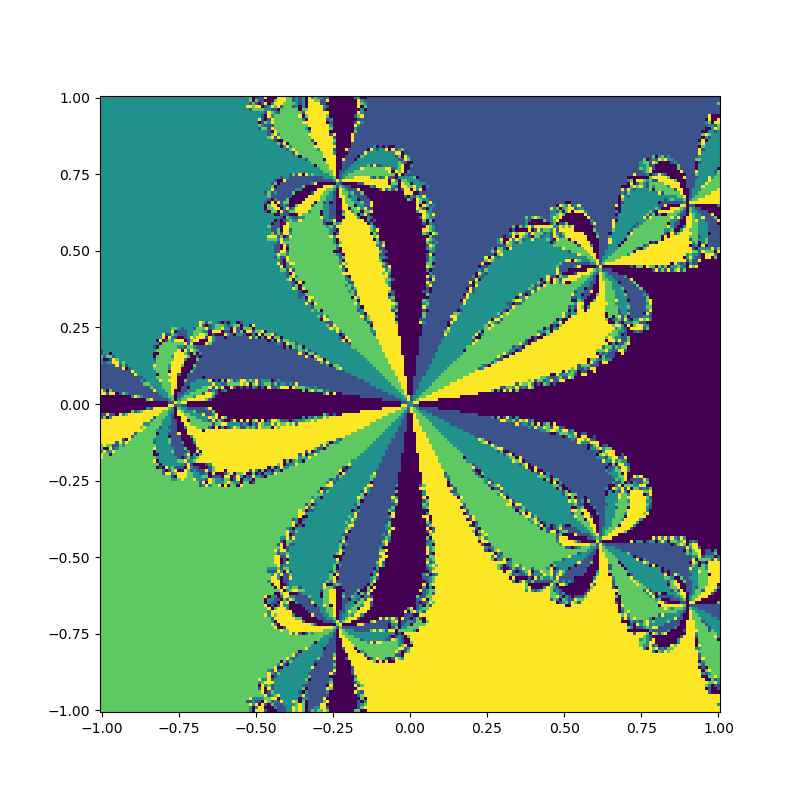

In [35]:
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        find_root = abs(roots - newton_iteration(f, df, initial[i,j], maxiter=20)[0])
        results[i,j] = np.argmin(find_root)


fig, ax1 = plt.subplots(figsize=(8, 8))
h = plt.pcolormesh(XR, YR, results)
plt.show()

<IPython.core.display.Javascript object>


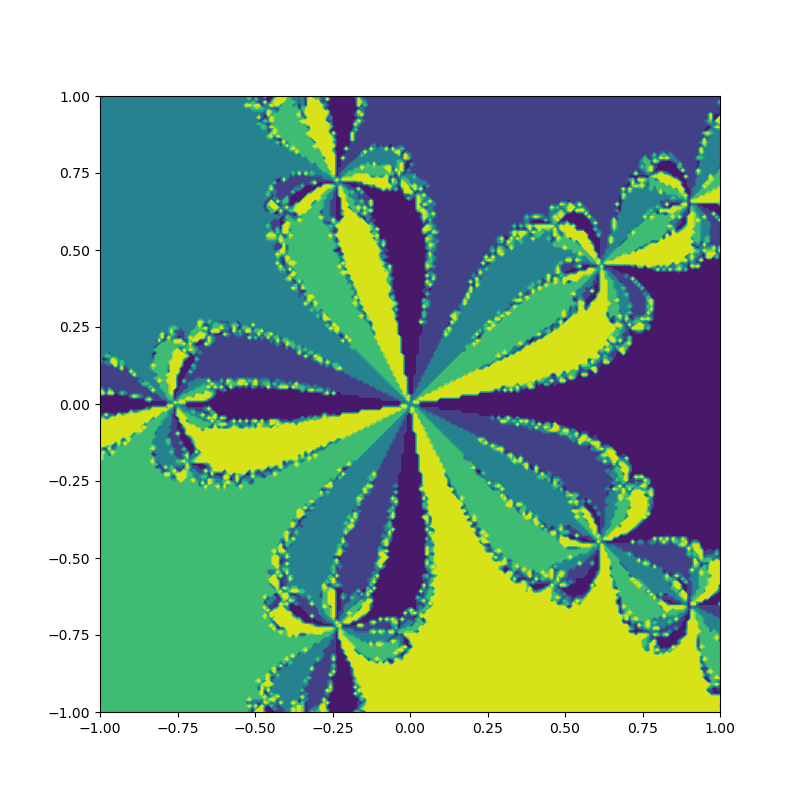

In [36]:
fig, ax1 = plt.subplots(figsize=(8, 8))
h = plt.contourf(XR, YR, results)
plt.show()

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона, начиная с x0.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 1000).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    ###BEGIN SOLUTION
    ###END SOLUTION

### Локальная интерполяция
Пусть известны три пары значений $x_i, f(x_i)$, построим параболу, найдём где пересекает...


In [37]:
def f(x, u):
    return np.tan(x/2) - np.sqrt(2*u-x*x)/x

<IPython.core.display.Javascript object>


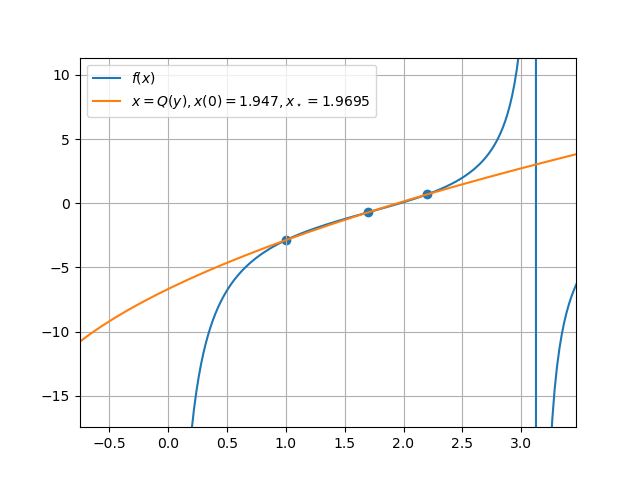

/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x
/tmp/ipykernel_14426/387877406.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(x/2) - np.sqrt(2*u-x*x)/x


In [45]:
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
plt.figure()
u = 6.34
k = np.linspace(0, 20, 1000)
plt.plot(k, f(k, u), label=r'$f(x)$')
plt.grid()
plt.xlim(0.5, 3)
plt.ylim(-10, 10)

xpt = [1, 1.7, 2.2]
ypt = [f(_, u) for _ in xpt]

plt.scatter(xpt, ypt)




poly = lagrange(ypt, xpt)
y = np.linspace(-20,10)
plt.plot(Polynomial(poly.coef[::-1])(y), y, 
         label=fr'$x= Q(y), x(0) = {Polynomial(poly.coef[::-1])(0.):.3f}, x_\star = {brentq(f, 1, 3, args=u):.4f}$')



plt.legend()

In [43]:
from scipy.optimize import brentq
brentq(f, 1, 3, args=u)

1.969472343031125

# Метод Ньютона для системы
Локальная линеарезация
$$
F(x_0 + \Delta)\approx F(x_0) + F'(x_0) \Delta \approx 0 \implies \Delta= F(x_0)/F'(x_0) \implies x_{n+1} = x_n + \Delta_n
$$
Перепишем более общо: линейная задача на $\Delta$:

$$
F'(x_0)\Delta = -F(x_0)
$$


Можно векторизовать теперь:
$$\mathbf{x} = (x_1, x_2, \dots), \; \mathbf{F} = (f_1, f_2, \dots), \; \hat{F'}_{i, j} = \frac{\partial f_i}{\partial{x_j}}$$

Имеем на каждом шаге задачу линейную задачу

$$
F'_{ij} \Delta_j = -F_i
$$